In [1]:
from pydataset import data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# Is there a difference in grades of students on the second floor 
# compared to grades of all students?

#one-sample t-test.

In [ ]:
# Are adults who drink milk taller than adults who dont drink milk?

# independent samples t-test.

In [ ]:
# Is the the price of gas higher in texas or in new mexico?

# independent samples t-test

In [2]:
# Are there differences in stress levels between students who take
# data science vs students who take web development vs 
# students who take cloud academy?



# ANOVA Analysis of Variance

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [5]:
mean1 = 90 
std1 = 15 
sample1 = 50

#Office 2
mean2 = 100 
std2 = 20 
sample2 = 50

α = .05

In [6]:
null_hypo = 'There is no significant change in averge time to sell homes between the two offices'
alt_hypo = 'There is a difference in the average time it takes to sell a home between each office'
confidence_level = .95
α = 1 - confidence_level

In [14]:
from scipy.stats import ttest_ind_from_stats
t, p = ttest_ind_from_stats(mean1, std1, sample1, mean2, std2, sample2)
t, p

(-2.82842712474619, 0.005673017820622928)

In [15]:
if (p/2) < α:
    print("Reject the null hypothesis")
else: 
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


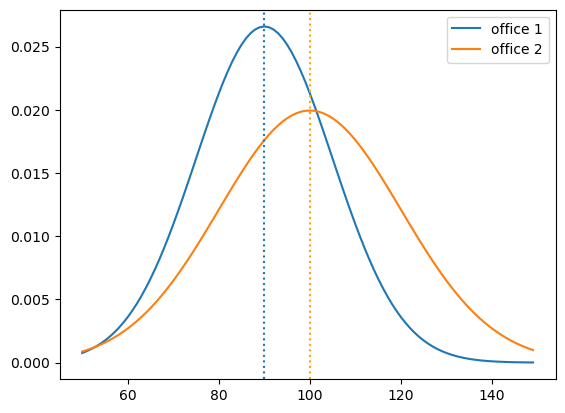

In [16]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [12]:
mpg = data('mpg')
mpg.head(3)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [ ]:
#1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [19]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1) 

mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [21]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [22]:
α = 0.05
p < α
# fail to reject the null hypothesis that there is no difference 
# in fuel-efficency in cars from 2008 and 1999.

False

In [25]:
fe_1999.mean()

19.68238764869729

In [26]:
fe_2008.mean()

19.488662986569054

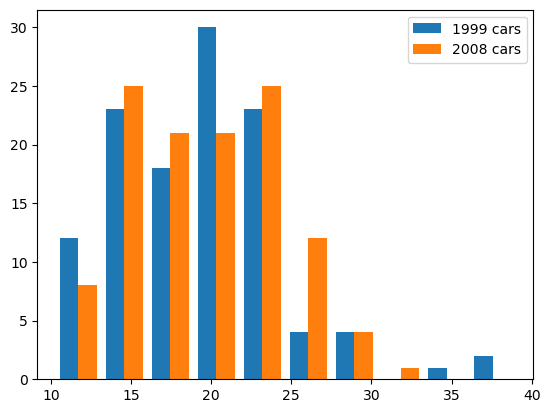

In [28]:
plt.hist([fe_1999, fe_2008], label=['1999 cars', '2008 cars'])
plt.legend()

In [ ]:
#2. Are compact cars more fuel-efficient than the average car?

Hypo - there is a difference in fuel-efficiency between compact cars and the overall average


Null - there is no difference in fuel-efficiency between compact cars and the overall average

In [29]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [31]:
α = 0.05
p/2 < α

True

In [ ]:
# we reject the null hypothesis that there is no difference in 
# fuel-efficiency between compact cars and the overall average.

In [17]:
#3. Do manual cars get better gas mileage than automatic cars?

hypo - there is a difference in gas mileage between manual and automatic cars


null - there is no difference in gas mileage between manual and automatic cars

In [32]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [33]:
p/2 < α

True

In [ ]:
# we reject the null hypothesis that there is no difference in gas
# mileage between manual and automatic cars

In [34]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')


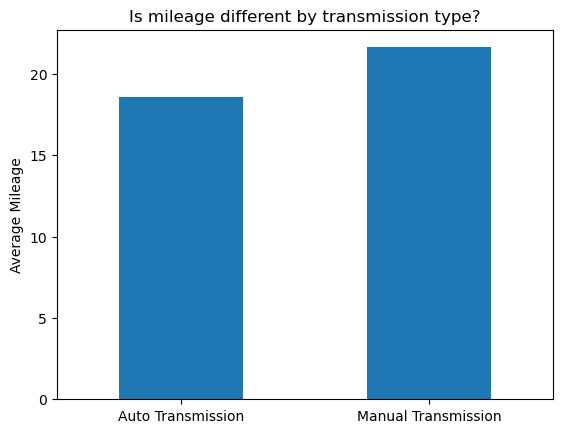

In [36]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average Mileage')
plt.title('Is mileage different by transmission type?')
plt.show()